In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline


In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/courtney/voxelmorph/src')

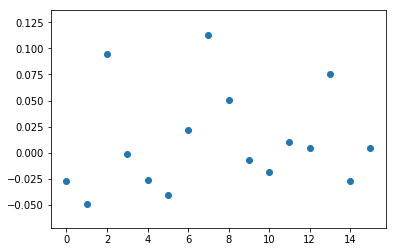

In [8]:
with open('/home/courtney/voxelmorph/src/cvpr_stats.txt', 'rb') as file:
    cvpr_results = pickle.loads(file.read()) # use `pickle.loads` to do the reverse

    
with open('/home/courtney/voxelmorph/src/seg_stats.txt', 'rb') as file:
    seg_results = pickle.loads(file.read()) # use `pickle.loads` to do the reverse

deltas = np.zeros(16)
for key, value in cvpr_results.items():
    deltas += np.array(value['l2_diff']) - np.array(seg_results[key]['l2_diff'])

deltas = deltas
    
plt.scatter([i for i in range(16)], deltas)
# print(results)